## **TUGAS BESAR MATA KULIAH KEAMANAN DATA**
---
### **Kelas DS-47-01**

| No | Nama | NIM |
|----|---------------------------|-------------|
| 1 | **Julian Sudianto** | *103052300045* |
| 2 | **Yohana Lydia** | *103052330068* |
| 3 | **Alishadena C.N.R.H** | *103052300032* |
| 4 | **Annisa Azzahra Rahmah** | *103052300056* |


### **LAPORAN ANALISIS BAGIAN 1**
---

#### **1. PENDAHULUAN**

**Tema Project**

Tema project ini adalah mengenai privasi dan keamanan data, serta anonimisasi Bank Marketing Dataset.

**Identifikasi Dataset**

Dataset yang digunakan berupa Bank Client Data yang berisi informasi terkait karakteristik nasabah, riwayat kontak pemasaran, serta respons terhadap kampanye pemasaran sebelumnya. Dataset ini berisi informasi sensitif dan juga data yang jika digabungkan dapat digunakan untuk mengidentifikasi identitas seseorang.

1. age: usia nasabah (numerik)
2. job: jenis pekerjaan nasabah (kategorikal)
3. marital: status pernikahan nasabah (kategorikal)
4. education: tingkat pendidikan terakhir nasabah (kategorikal)
5. default: menunjukkan apakah nasabah memiliki kredit (biner: yes/no)
6. balance: rata-rata saldo tahunan nasabah dalam euro (numerik)
7. housing: apakah nasabah memiliki pinjaman rumah (biner: yes/no)
8. loan: apakah nasabah memiliki pinjaman pribadi (biner: yes/no)
9. contact: jenis media komunikasi yang digunakan (kategorikal)
10. day: hari dalam bulan ketika kontak terakhir dilakukan (numerik)
11. month: bulan ketika kontak terakhir dilakukan (kategorikal)
12. duration: durasi panggilan terakhir dalam detik (numerik)
13. campaign: jumlah kontak yang dilakukan pada kampanye saat ini (numerik)
14. pdays: jumlah hari sejak kontak terakhir pada kampanye sebelumnya; -1 berarti belum pernah dihubungi (numerik)
15. previous: jumlah kontak pada kampanye sebelumnya (numerik)
16. poutcome: hasil dari kampanye pemasaran sebelumnya (kategorikal)
17. y: apakah nasabah berlangganan deposito berjangka (biner: yes/no)

**Tujuan Analisis**

1. Menilai tingkat keamanan dan kerentanan privasi pada Bank Marketing Dataset.

2. Mengidentifikasi quasi-identifiers yang berpotensi menyebabkan re-identifikasi individu.

3. Mengukur tingkat anonimitas data menggunakan k-anonymity.

4. Mengevaluasi keberagaman nilai sensitif menggunakan l-diversity.

5. Menentukan risiko identity disclosure dan attribute disclosure berdasarkan hasil evaluasi.

#### **2. LOADING DATA**

##### **Import Libraries**

In [77]:
import pandas as pd #untuk membaca file csv
import numpy as np #untuk operasi matematika
import matplotlib.pyplot as plt #untuk melakukan visualisasi data

##### **Import Dataset**

In [78]:
df = pd.read_csv('bank-full.csv', delimiter=';') #membaca file bank-full.csv sebagai dataframe
df_sample = df.sample(n=1500, random_state=42) #mengambil 1500 data acak
df_sample.head() #menampilkan 5 data teratas

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
3776,40,blue-collar,married,secondary,no,580,yes,no,unknown,16,may,192,1,-1,0,unknown,no
9928,47,services,single,secondary,no,3644,no,no,unknown,9,jun,83,2,-1,0,unknown,no
33409,25,student,single,tertiary,no,538,yes,no,cellular,20,apr,226,1,-1,0,unknown,no
31885,42,management,married,tertiary,no,1773,no,no,cellular,9,apr,311,1,336,1,failure,no
15738,56,management,married,tertiary,no,217,no,yes,cellular,21,jul,121,2,-1,0,unknown,no


##### **Exporatory Data Analysis**

In [79]:
df_sample.shape #mengecek jumlah baris dan kolom

(1500, 17)

In [80]:
df_sample.info() #mengecek tipe data dan jumlah missing value

<class 'pandas.core.frame.DataFrame'>
Index: 1500 entries, 3776 to 10764
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        1500 non-null   int64 
 1   job        1500 non-null   object
 2   marital    1500 non-null   object
 3   education  1500 non-null   object
 4   default    1500 non-null   object
 5   balance    1500 non-null   int64 
 6   housing    1500 non-null   object
 7   loan       1500 non-null   object
 8   contact    1500 non-null   object
 9   day        1500 non-null   int64 
 10  month      1500 non-null   object
 11  duration   1500 non-null   int64 
 12  campaign   1500 non-null   int64 
 13  pdays      1500 non-null   int64 
 14  previous   1500 non-null   int64 
 15  poutcome   1500 non-null   object
 16  y          1500 non-null   object
dtypes: int64(7), object(10)
memory usage: 210.9+ KB


In [81]:
df_sample.describe() #mengecek statistik deskriptif

,age,balance,day,duration,campaign,pdays,previous
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000
mean,41.104000,1388.294000,15.996000,262.790667,2.780000,41.987333,0.642667
std,10.395122,2731.593424,8.253326,258.570017,2.860021,102.914243,2.280888
min,18.000000,-1050.000000,1.000000,1.000000,1.000000,-1.000000,0.000000
25%,33.000000,100.000000,9.000000,106.000000,1.000000,-1.000000,0.000000
50%,40.000000,490.500000,16.000000,178.500000,2.000000,-1.000000,0.000000
75%,49.000000,1447.250000,22.000000,324.250000,3.000000,-1.000000,0.000000
max,82.000000,27696.000000,31.000000,1865.000000,31.000000,686.000000,30.000000


In [82]:
df_sample.duplicated().sum() #mengecek jumlah data duplikat

0

In [83]:
df_sample.select_dtypes(include='number').corr() #mengecek korelasi antar atribut numerik

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.081694,-0.009365,0.009646,0.002992,-0.009472,0.013161
balance,0.081694,1.000000,0.024332,0.024577,0.008380,0.008421,0.032991
day,-0.009365,0.024332,1.000000,-0.095472,0.203674,-0.085347,-0.009361
duration,0.009646,0.024577,-0.095472,1.000000,-0.094748,-0.008610,-0.004425
campaign,0.002992,0.008380,0.203674,-0.094748,1.000000,-0.091383,-0.009707
pdays,-0.009472,0.008421,-0.085347,-0.008610,-0.091383,1.000000,0.519765
previous,0.013161,0.032991,-0.009361,-0.004425,-0.009707,0.519765,1.000000


Hasil korelasi antar atribut numerik menunjukkan bahwa hampir semua pasangan variabel memiliki korelasi yang sangat rendah, sehingga tidak terdapat hubungan linear yang kuat di antara mereka. Satu-satunya korelasi yang sedikit lebih tinggi adalah antara pdays dan previous (sekitar 0.52). Hal tersebut diakibatkan keduanya sama-sama menggambarkan riwayat kontak sebelumnya. Secara umum, variabel numerik bersifat tidak saling memengaruhi secara signifikan.

##### **Identifikasi Atribut Sensitif**

Berdasarkan UU Nomor 27 Tahun 2022 tentang Perlindungan Data Pribadi, data pribadi terbagi menjadi *Data Pribadi Spesifik* (data kesehatan, biometrik, genetika, catatan kejahatan, data anak, dan data keuangan pribadi), serta *Data Pribadi Umum* (nama lengkap, jenis kelamin, agama, status perkawinan, dan data lain yang dapat mengidentifikasi seseorang bila dikombinasikan).

Pada dataset ini tidak terdapat data spesifik, tetapi terdapat beberapa *Data Pribadi Umum*, seperti usia, pekerjaan, status pernikahan, pendidikan, serta kondisi finansial sederhana yang dapat menggambarkan menggambarkan identitas dasar nasabah. Meskipun bukan data spesifik, sebagian besar kolom tersebut berfungsi sebagai quasi-identifiers, yaitu atribut yang secara individual tidak mengidentifikasi seseorang namun dapat mengungkap identitas bila dikombinasikan.

Pada dataset ini, atribut seperti *age, job, marital, education, balance, housing, loan,* dan *default* termasuk sebagai quasi-identifiers karena nilai-nilai tersebut dapat membedakan individu dan berpotensi mengungkap identitas ketika digabungkan satu sama lain. Atribut-atribut ini tidak sensitif secara individual, namun kombinasi seperti usia tertentu, jenis pekerjaan, status pernikahan, serta kondisi pinjaman dapat membentuk kelompok yang sangat kecil sehingga meningkatkan risiko re-identifikasi. Sementara itu, atribut y dikategorikan sebagai sensitive attribute karena berisi informasi keputusan pribadi nasabah terkait partisipasi dalam produk deposito berjangka. Informasi ini bersifat sensitif dalam konteks privasi dan perlu dilindungi agar tidak dapat ditebak melalui kombinasi quasi-identifiers.

In [84]:
print(df_sample.columns) #mengecek nama kolom

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')


In [85]:
#Atribut Sensitif
sensitive_attributes = ['y']

#Quasi-identifiers
quasi_cols = ["age","job","marital","education", 'default','balance','housing','loan']

#### **3. Identifikasi dan Analisis Risiko Privasi**

Menggunakan metode K-Anonymity dan L-Diversity

##### **K-Anonymity Evaluation**

In [86]:
#K-Anonymity Eval
grouped = df_sample.groupby(quasi_cols) #mengelompokkan data berdasarkan quasi-identifiers
group_size = grouped.size().rename("k").reset_index() #menghitung jumlah data dalam setiap kelompok

k_stats = group_size["k"].describe(percentiles=[0.25, 0.5, 0.75, 0.9]) #menghitung statistik deskriptif
print(k_stats) #menampilkan statistik deskriptif

count    1490.000000
mean        1.006711
std         0.081675
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
90%         1.000000
max         2.000000
Name: k, dtype: float64


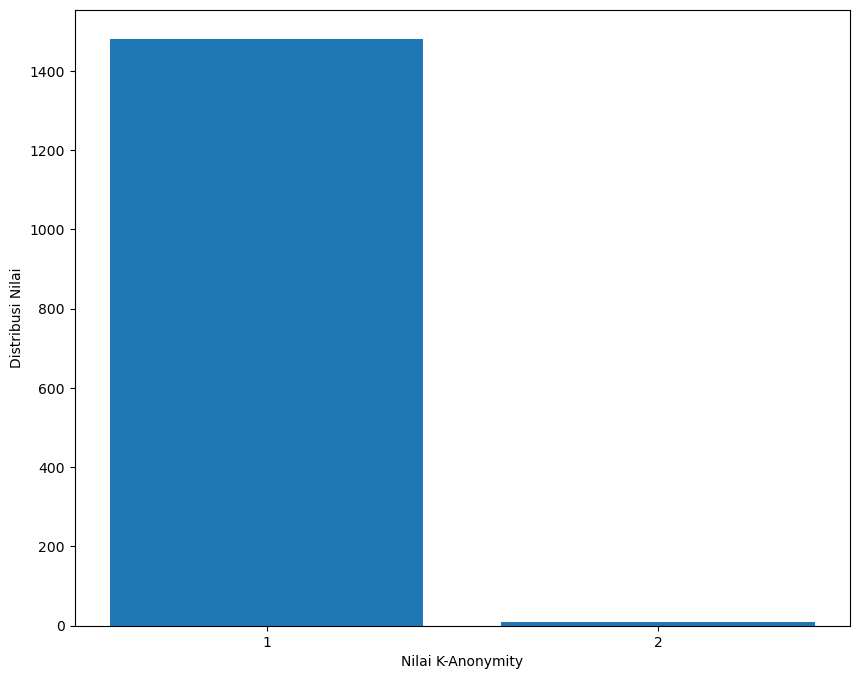

In [87]:
#Visualizing K-Anonymity 
k_counts = group_size["k"].value_counts().sort_index() #menghitung distribusi nilai k-anonymity
k_counts_abnormal = k_counts[k_counts.index <= 10] #mengambil nilai k-anonymity yang kurang dari atau sama dengan 10

#menampilkan distribusi nilai k-anonymity
plt.figure(figsize=(10,8))
plt.bar(k_counts_abnormal.index, k_counts_abnormal.values)
plt.xlabel("Nilai K-Anonymity")
plt.ylabel("Distribusi Nilai")
plt.xticks(k_counts_abnormal.index)
plt.show()

Hasil visualisasi K-Anonymity menunjukkan bahwa sebagian besar kombinasi quasi-identifiers pada dataset menghasilkan nilai k = 1, yang berarti setiap baris data memiliki kombinasi atribut yang unik. Hanya sebagian kecil kelompok yang memiliki nilai k = 2, sehingga tingkat anonimitas keseluruhan masih sangat rendah. Kondisi ini mengindikasikan bahwa dataset memiliki risiko re-identifikasi yang tinggi, karena seseorang dapat dikenali hanya dengan melihat kombinasi atribut demografis dan finansialnya.

##### **L-Diversity Evaluation**

In [88]:
l_div = df_sample.groupby(quasi_cols)[sensitive_attributes].agg(lambda col: col.nunique()).reset_index() #menghitung l-diversity untuk setiap kelompok
l_div = l_div.rename(columns={c: f"l_div_{c}" for c in sensitive_attributes}) #mengubah nama kolom dari sensitive_attributes

print(l_div.head(10)) #menampilkan 10 data teratas

   age          job  marital  education default  balance housing loan  l_div_y
0   18      student   single  secondary      no        5      no   no        1
1   18      student   single    unknown      no      108      no   no        1
2   19      student   single    unknown      no        0      no   no        1
3   20  blue-collar  married    primary      no     -172     yes  yes        1
4   20      student  married    unknown      no      292      no   no        1
5   20      student   single  secondary      no       88      no   no        1
6   20      student   single  secondary      no     1819      no   no        1
7   21  blue-collar   single  secondary     yes      -59     yes  yes        1
8   21      student   single  secondary      no      794      no   no        1
9   21      student   single  secondary      no     2488      no   no        1


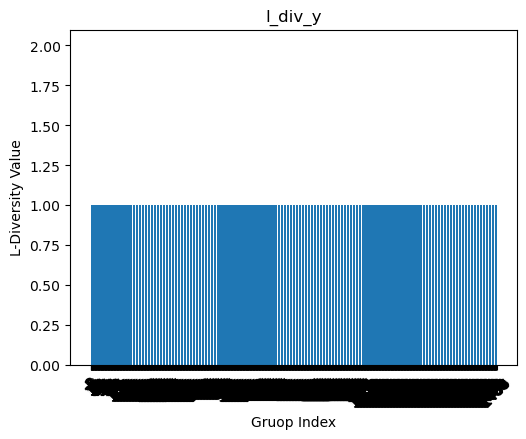

In [89]:
#Visualize L-Diversity Evaluation

sens_cols = [f"l_div_{c}" for c in sensitive_attributes] #mengambil nama kolom dari sensitive_attributes
fig, axes = plt.subplots(2,2,figsize=(10,8)) #membuat figure dengan 2 baris dan 2 kolom
axes = axes.flatten() #mengubah array 2D menjadi 1D

for i, col in enumerate(sens_cols):
    ax = axes[i]
    ax.bar(l_div.index.astype(str), l_div[col])
    ax.set_title(col) #menambahkan judul pada setiap subplot
    ax.set_xlabel("Gruop Index") #menambahkan label pada sumbu x
    ax.set_ylabel("L-Diversity Value") #menambahkan label pada sumbu y
    ax.tick_params(axis='x', labelrotation=45)

for j in range(i+1, 4):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show() #menampilkan figure

Nilai L-Diversity pada grafik menunjukkan bahwa hampir semua grup memiliki nilai l = 1, yang berarti setiap grup hanya mengandung satu nilai sensitif yang sama untuk atribut target y. Kondisi ini menunjukkan kurangnya keberagaman nilai sensitif dalam tiap grup, sehingga perlindungan privasi sangat rendah. Hasil ini dapat diartikan bahwa data tidak memenuhi standar L-Diversity yang baik, karena idealnya setiap grup harus memiliki lebih dari satu nilai sensitif untuk mencegah re-identifikasi.

#### **5. Kesimpulan**

Berdasarkan hasil K-Anonymity dan L-Diversity, tingkat risiko privasi pada dataset ini tergolong sangat tinggi. K-Anonymity yang didominasi nilai k = 1 menunjukkan bahwa sebagian besar individu dapat diidentifikasi hanya dari kombinasi quasi-identifiers yang mereka miliki, sehingga peluang re-identifikasi sangat besar. Kondisi ini diperparah oleh L-Diversity yang bernilai l = 1 pada hampir semua grup, menandakan bahwa nilai sensitif (y) tidak memiliki variasi dan dapat ditebak dengan mudah jika identitas seseorang diketahui. Secara keseluruhan, kombinasi k yang rendah dan l yang rendah memperlihatkan bahwa dataset ini sangat rentan terhadap *linkage attack, attribute disclosure*, dan *identity disclosure*, sehingga tidak aman untuk dibagikan atau dianalisis tanpa proses anonimisasi lebih lanjut.